In [1]:
%matplotlib inline

import torch
from collections import defaultdict
import pickle
import os

import training
import benchmark


# add parent directoru path and import Snake env
import sys
sys.path.append('..')
from envs.snake import Snake

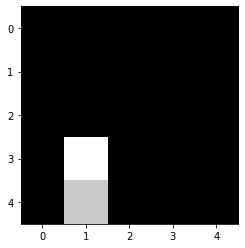

steps_without_gain: 0
direction: 3
target: (3, 1)
target_distance: (0, 0)
obstacle_distance: (4, 3, 0)


In [2]:
env = Snake(side=5)
env.render()

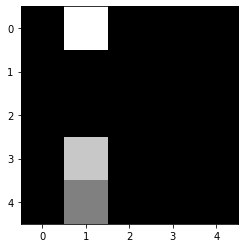

steps_without_gain: 0
direction: 0
target: (0, 1)
target_distance: (3, 0)
obstacle_distance: (1, 3, 3)


In [3]:
env.step(Snake.LEFT)
env.render()

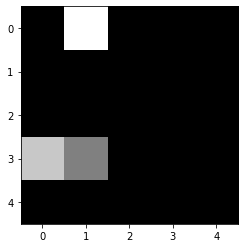

steps_without_gain: 1
direction: 1
target: (0, 1)
target_distance: (-1, -3)
obstacle_distance: (1, 0, 3)


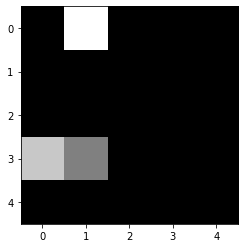

steps_without_gain: 1
direction: 1
target: (0, 1)
target_distance: (-1, -3)
obstacle_distance: (1, 0, 3)


In [4]:
done = False
while not done:
    action = env.action_space.sample()
    state, reward, done, _ = env.step(action)
    env.render()

## Train model

### Create environment

In [5]:
env = Snake(side=10)

### Recover saved Q-Table if exists

In [6]:
save_file = 'Snake_saved/Snake-qtable.pkl'

if os.path.exists(save_file):
    with open(save_file, 'rb') as f:
        mk_entry = lambda: torch.zeros((env.action_space.n,))
        q_table = defaultdict(mk_entry, pickle.load(f)) 
else:
    q_table = None

### Fit Q-Table

In [16]:
best_score, q_table = training.fit(env, q_table, episodes=500_000, epsilon_min=0.35)

Episode 1000: New best score! 1019.0
Episode 6000: New best score! 1101.0
Episode 11000: New best score! 1116.0
Episode 111000: New best score! 1120.0
Episode 141000: New best score! 1136.0


KeyboardInterrupt: 

### Save Q-Table

In [ ]:
with open(save_file, 'wb') as f:
    pickle.dump(dict(q_table), f)

### Play an episode

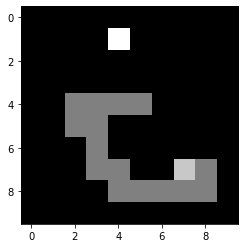

steps_without_gain: 1
direction: 2
target: (1, 4)
target_distance: (-6, -3)
obstacle_distance: (0, 0, 0)


In [21]:
from IPython.display import clear_output
import time
import torch

env = Snake(side=10, max_steps_without_gain=1000)
state = env.reset()
done = False
while not done:
    action = torch.argmax(q_table[state]).item()
    state, _, done, _ = env.step(action)
    clear_output()
    env.render()
    time.sleep(0.05)
    